#### Eda for the vessels dataset

In [36]:
import pandas as pd


train_df = pd.read_csv("../data/original_data/ais_train.csv", sep="|")
test_df = pd.read_csv("../data/original_data/ais_test.csv",)
vessels_df = pd.read_csv('../data/original_data/vessels.csv', sep="|")

In [37]:
vessels_df.head()

,shippingLineId,vesselId,CEU,DWT,GT,NT,vesselType,breadth,depth,draft,enginePower,freshWater,fuel,homePort,length,maxHeight,maxSpeed,maxWidth,rampCapacity,yearBuilt
0,61a8e672f9cba188601e84ab,61e9f38eb937134a3c4bfd8b,6500,21200.0,58684,17606.0,83.0,32.0,22.20,NaN,0.0,NaN,NaN,OSLO,199.00,5.0,18.6,15.2,150.0,2000
1,61ec94f1a8cafc0e93f0e92a,61e9f38eb937134a3c4bfd8d,4902,12325.0,46800,NaN,83.0,31.0,NaN,NaN,14220.0,NaN,NaN,MONROVIA,182.00,NaN,NaN,NaN,NaN,2006
2,61e213d5d612676a0f0fb755,61e9f38eb937134a3c4bfd8f,5000,13059.0,46800,NaN,83.0,31.0,NaN,NaN,14220.0,NaN,NaN,SAINT JOHN'S,182.00,NaN,NaN,NaN,NaN,2010
3,61be24574ea00ae59d0fe388,61e9f38eb937134a3c4bfd91,4200,12588.0,39362,NaN,83.0,28.0,NaN,NaN,11060.0,NaN,NaN,NaN,167.00,NaN,NaN,NaN,NaN,2011
4,61a8e673f9cba188601e84ae,61e9f390b937134a3c4bfd93,7450,21052.0,75528,24391.0,83.0,37.2,22.23,NaN,13140.0,491.47,3236.78,Panama,199.98,NaN,NaN,NaN,NaN,2018


In [38]:
print(f"Rows in train_df: {len(train_df)}")
print(f"Rows in test_df: {len(test_df)}")
print(f"Rows in vessels_df: {len(vessels_df)}")

unique_vessel_ids_in_vessels_df = vessels_df["vesselId"].unique()


print(len(unique_vessel_ids_in_vessels_df))

Rows in train_df: 1522065
Rows in test_df: 51739
Rows in vessels_df: 711
711


From [vesselID_encoder](/processors/vesselID_encoder.ipynb), we know that:
- All vesselIds in test are present in train.
- All vesselIds in train are present in vessels.

In [39]:
# Merge vessels_df with train_df on 'vesselId', keeping only the rows from vessels_df that match
vessels_in_train_df = pd.merge(vessels_df, train_df[['vesselId']], on='vesselId', how='inner').drop_duplicates()

print(f"Rows of vessels_df that have a vesselId that is also present in train_df: {len(vessels_in_train_df)}")

vessels_in_train_df.head()


Rows of vessels_df that have a vesselId that is also present in train_df: 688


,shippingLineId,vesselId,CEU,DWT,GT,NT,vesselType,breadth,depth,draft,enginePower,freshWater,fuel,homePort,length,maxHeight,maxSpeed,maxWidth,rampCapacity,yearBuilt
0,61a8e672f9cba188601e84ab,61e9f38eb937134a3c4bfd8b,6500,21200.0,58684,17606.0,83.0,32.0,22.20,NaN,0.0,NaN,NaN,OSLO,199.00,5.0,18.6,15.2,150.0,2000
402,61ec94f1a8cafc0e93f0e92a,61e9f38eb937134a3c4bfd8d,4902,12325.0,46800,NaN,83.0,31.0,NaN,NaN,14220.0,NaN,NaN,MONROVIA,182.00,NaN,NaN,NaN,NaN,2006
6415,61e213d5d612676a0f0fb755,61e9f38eb937134a3c4bfd8f,5000,13059.0,46800,NaN,83.0,31.0,NaN,NaN,14220.0,NaN,NaN,SAINT JOHN'S,182.00,NaN,NaN,NaN,NaN,2010
7086,61be24574ea00ae59d0fe388,61e9f38eb937134a3c4bfd91,4200,12588.0,39362,NaN,83.0,28.0,NaN,NaN,11060.0,NaN,NaN,NaN,167.00,NaN,NaN,NaN,NaN,2011
7917,61a8e673f9cba188601e84ae,61e9f390b937134a3c4bfd93,7450,21052.0,75528,24391.0,83.0,37.2,22.23,NaN,13140.0,491.47,3236.78,Panama,199.98,NaN,NaN,NaN,NaN,2018


In [40]:
nan_counts = vessels_in_train_df.isna().sum()

# Display the result
print(nan_counts)

vessels_in_train_df.head()

shippingLineId      0
vesselId            0
CEU                 0
DWT                 7
GT                  0
NT                505
vesselType         11
breadth             7
depth             450
draft             678
enginePower        19
freshWater        470
fuel              470
homePort          131
length              0
maxHeight         654
maxSpeed          479
maxWidth          654
rampCapacity      655
yearBuilt           0
dtype: int64


,shippingLineId,vesselId,CEU,DWT,GT,NT,vesselType,breadth,depth,draft,enginePower,freshWater,fuel,homePort,length,maxHeight,maxSpeed,maxWidth,rampCapacity,yearBuilt
0,61a8e672f9cba188601e84ab,61e9f38eb937134a3c4bfd8b,6500,21200.0,58684,17606.0,83.0,32.0,22.20,NaN,0.0,NaN,NaN,OSLO,199.00,5.0,18.6,15.2,150.0,2000
402,61ec94f1a8cafc0e93f0e92a,61e9f38eb937134a3c4bfd8d,4902,12325.0,46800,NaN,83.0,31.0,NaN,NaN,14220.0,NaN,NaN,MONROVIA,182.00,NaN,NaN,NaN,NaN,2006
6415,61e213d5d612676a0f0fb755,61e9f38eb937134a3c4bfd8f,5000,13059.0,46800,NaN,83.0,31.0,NaN,NaN,14220.0,NaN,NaN,SAINT JOHN'S,182.00,NaN,NaN,NaN,NaN,2010
7086,61be24574ea00ae59d0fe388,61e9f38eb937134a3c4bfd91,4200,12588.0,39362,NaN,83.0,28.0,NaN,NaN,11060.0,NaN,NaN,NaN,167.00,NaN,NaN,NaN,NaN,2011
7917,61a8e673f9cba188601e84ae,61e9f390b937134a3c4bfd93,7450,21052.0,75528,24391.0,83.0,37.2,22.23,NaN,13140.0,491.47,3236.78,Panama,199.98,NaN,NaN,NaN,NaN,2018


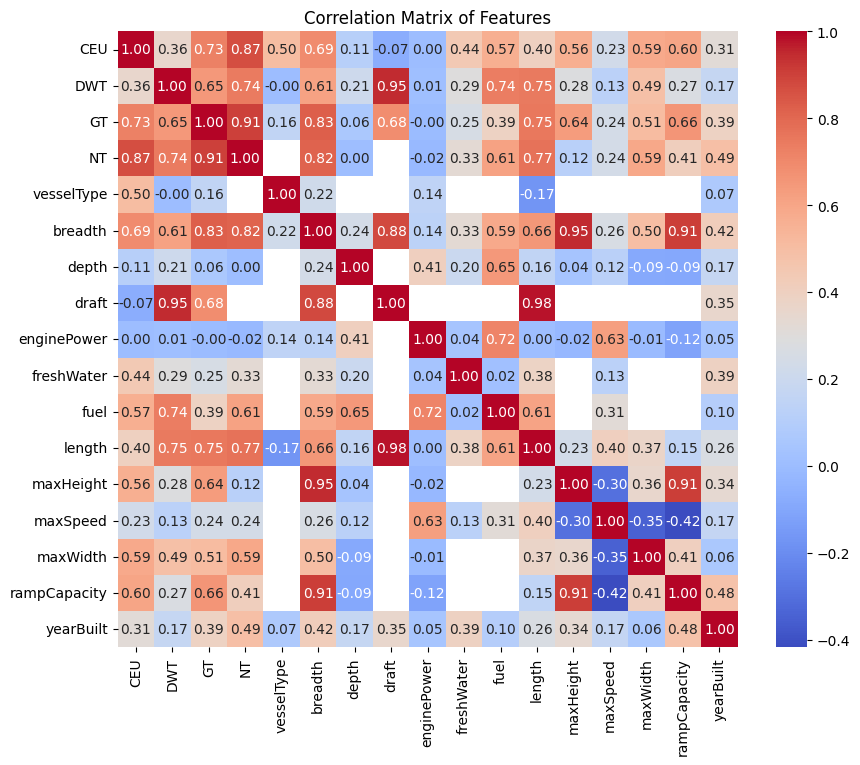

In [41]:
vessels_in_train_df = vessels_in_train_df.drop(columns=['vesselId', 'shippingLineId', 'homePort'])

correlation_matrix = vessels_in_train_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

Mean: 6799.748878923767
Median: 0.0


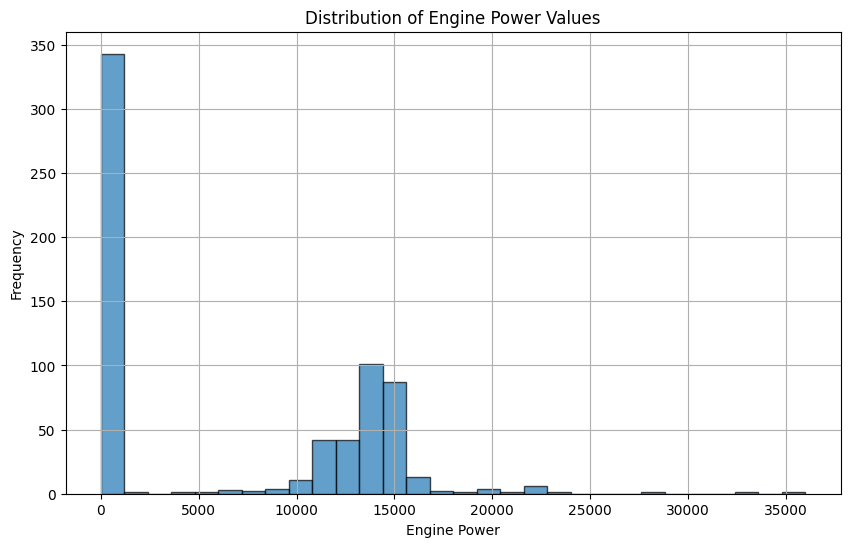

In [43]:
mean_engine_power = vessels_in_train_df["enginePower"].mean()
median_engine_power = vessels_in_train_df["enginePower"].median()


print(f"Mean: {mean_engine_power}")
print(f"Median: {median_engine_power}")


engine_power_values = vessels_in_train_df['enginePower'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(engine_power_values, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Engine Power Values')
plt.xlabel('Engine Power')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()



In [44]:
df = vessels_in_train_df[vessels_in_train_df["enginePower"] != 0]

mean_engine_power = df["enginePower"].mean()
median_engine_power = df["enginePower"].median()

print(f"Mean: {mean_engine_power}")
print(f"Median: {median_engine_power}")

Mean: 13954.085889570551
Median: 14121.0


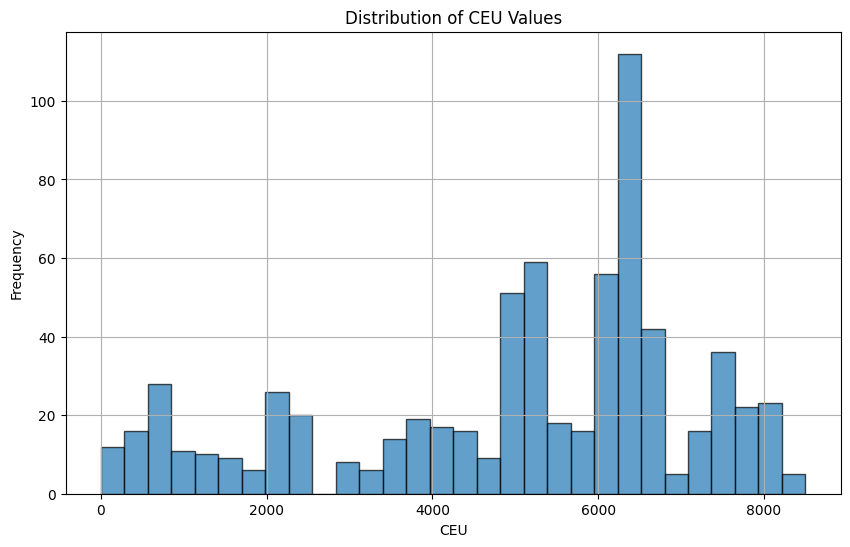

In [45]:
ceu_values = vessels_in_train_df['CEU'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(ceu_values, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of CEU Values')
plt.xlabel('CEU')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

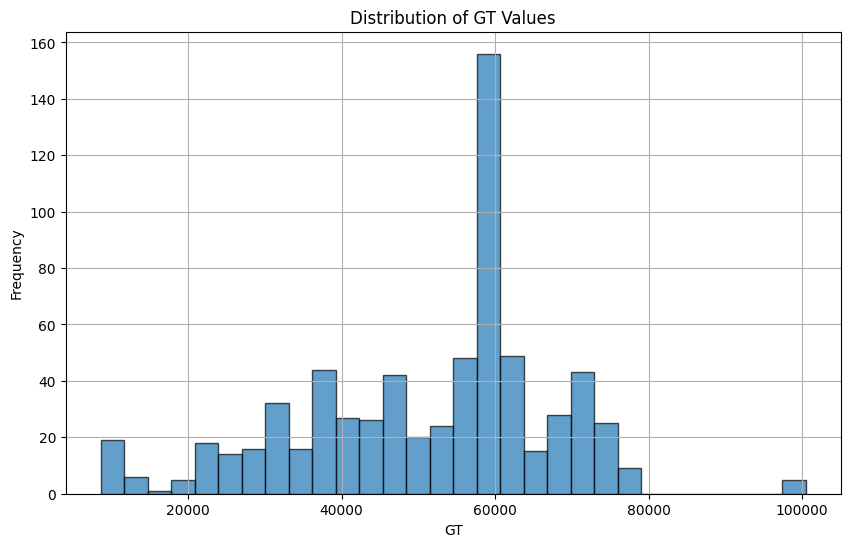

In [48]:
gt_values = vessels_in_train_df['GT'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(gt_values, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of GT Values')
plt.xlabel('GT')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

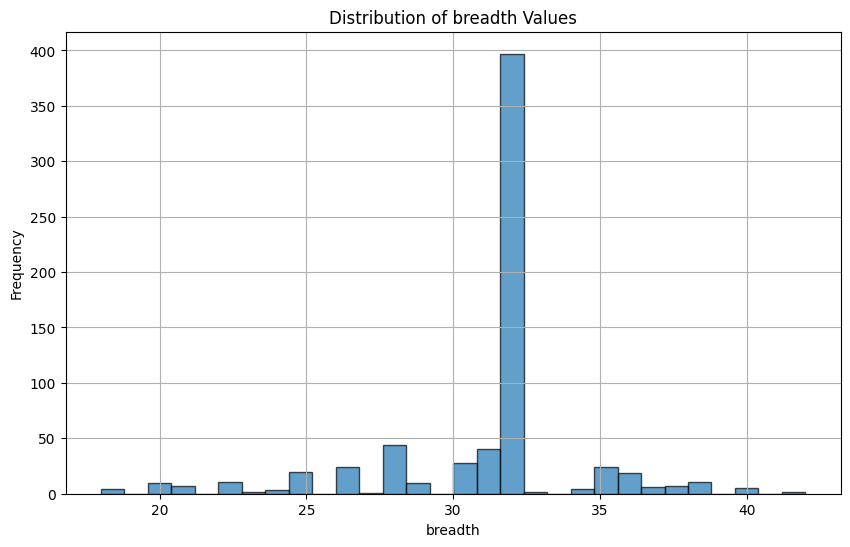

Mean: 31.109280469897207
Median: 32.0


In [52]:
breadth_values = vessels_in_train_df['breadth']

plt.figure(figsize=(10, 6))
plt.hist(breadth_values, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of breadth Values')
plt.xlabel('breadth')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

df = vessels_in_train_df[vessels_in_train_df["breadth"] != 0]

mean_breadth = df["breadth"].mean()
median_breadth = df["breadth"].median()

print(f"Mean: {mean_breadth}")
print(f"Median: {median_breadth}")

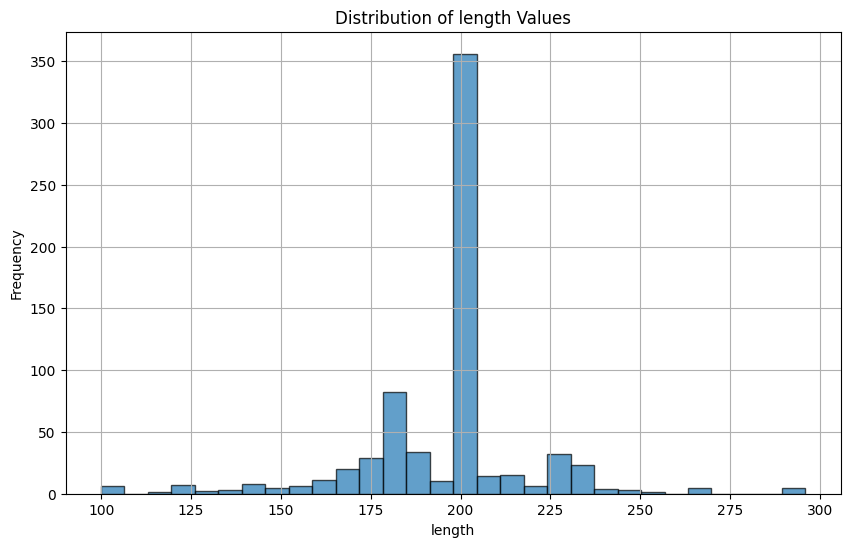

In [51]:
length_values = vessels_in_train_df['length']

plt.figure(figsize=(10, 6))
plt.hist(length_values, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of length Values')
plt.xlabel('length')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

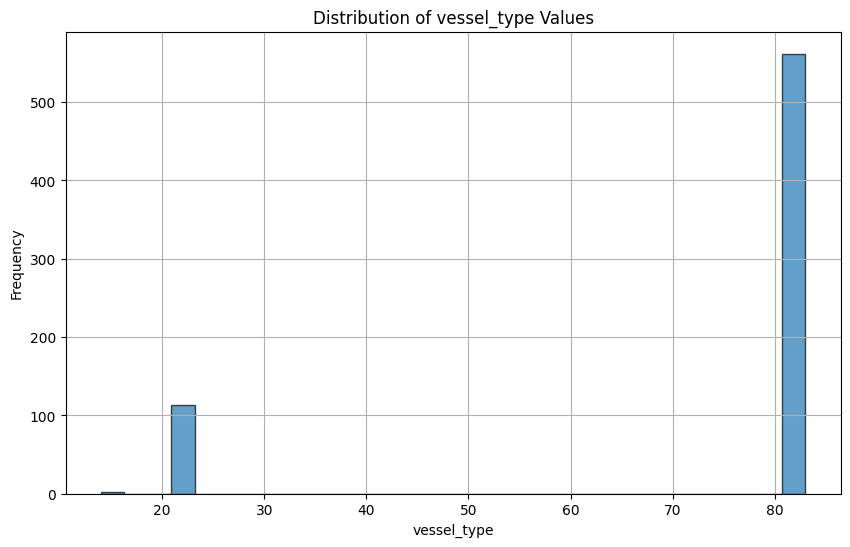

Median: 83.0


In [56]:
vessel_type_values = vessels_in_train_df['vesselType']

plt.figure(figsize=(10, 6))
plt.hist(vessel_type_values, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of vessel_type Values')
plt.xlabel('vessel_type')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

print(f"Median: {df['vesselType'].median()}")

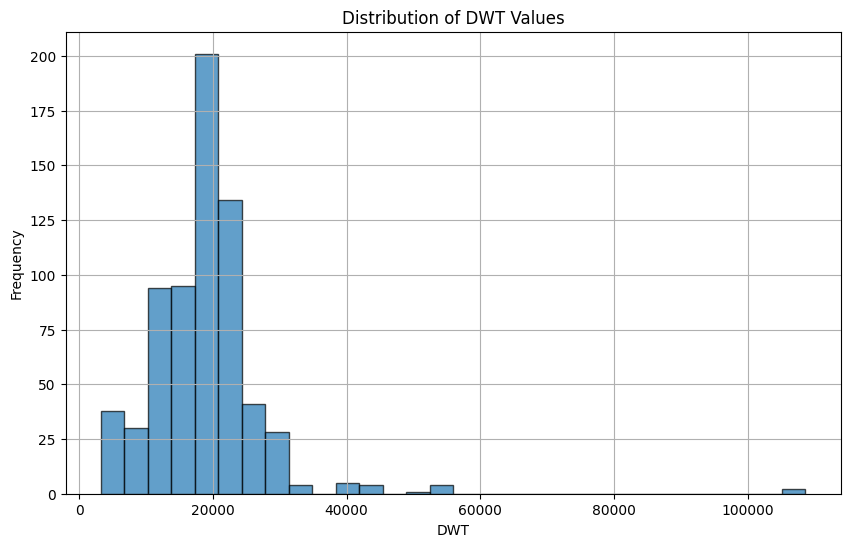

Median: 18758.0


In [57]:
dwt_type_values = vessels_in_train_df['DWT']

plt.figure(figsize=(10, 6))
plt.hist(dwt_type_values, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of DWT Values')
plt.xlabel('DWT')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

print(f"Median: {df['DWT'].median()}")